# Load Dataset from Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
!unzip  drive/Shareddrives/Bangkit\ Capstone/leaf_datasets.zip -d .

Mounted at /content/drive
Archive:  drive/Shareddrives/Bangkit Capstone/leaf_datasets.zip
   creating: ./Segmented Medicinal Leaf Images/
  inflating: ./Segmented Medicinal Leaf Images/nama_ilmiah.json  
   creating: ./Segmented Medicinal Leaf Images/train/
   creating: ./Segmented Medicinal Leaf Images/train/Lengkuas/
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-048.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-004.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-026.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-008.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-035.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-017.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-006.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/AG-S-042.jpg  
  inflating: ./Segmented Medicinal Leaf Images/train/Lengkuas/A

# Import Libraries

In [35]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
train_dir = './Segmented Medicinal Leaf Images/train'
test_dir = './Segmented Medicinal Leaf Images/test'

In [4]:
def list_images():
  classes_dirs = os.listdir(train_dir)
  for folder in classes_dirs:
    train_classes = os.listdir(os.path.join(train_dir, folder))
    test_classes = os.listdir(os.path.join(test_dir, folder))
    print(f"{folder}: \n \t{len(train_classes)} train images and {len(test_classes)} test images,  total {len(train_classes) + len(test_classes)} images")
list_images()

Malapari: 
 	42 train images and 19 test images,  total 61 images
Kelor: 
 	53 train images and 24 test images,  total 77 images
Jamblang: 
 	27 train images and 12 test images,  total 39 images
Salam Koja: 
 	42 train images and 18 test images,  total 60 images
Kerendang: 
 	51 train images and 23 test images,  total 74 images
Tanaman Ara Suci: 
 	44 train images and 19 test images,  total 63 images
Srigading: 
 	28 train images and 12 test images,  total 40 images
Mangga: 
 	43 train images and 19 test images,  total 62 images
Jambu Mawar: 
 	39 train images and 17 test images,  total 56 images
Bayam Malabar: 
 	72 train images and 31 test images,  total 103 images
Bayam Hijau: 
 	85 train images and 37 test images,  total 122 images
Jintan: 
 	33 train images and 15 test images,  total 48 images
Tanaman Ara: 
 	35 train images and 15 test images,  total 50 images
Mimba: 
 	42 train images and 18 test images,  total 60 images
Pepaya: 
 	35 train images and 15 test images,  total 50 i

In [5]:
# Load the first example of a horse
pepaya_class = os.path.join(train_dir, 'Pepaya')
sample_image  = load_img(f"{os.path.join(pepaya_class, os.listdir(pepaya_class)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (500, 500, 3)


In [54]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                              rotation_range = 25,
                              zoom_range = [0.5, 1.1],
                              width_shift_range=0.15, 
                              shear_range= 0.15,
                              height_shift_range=0.15,
                              horizontal_flip=True,
                              vertical_flip= True,
                              fill_mode='nearest',)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale = 1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [55]:
train_generator, validation_generator = train_val_generators(train_dir, test_dir)

Found 1308 images belonging to 32 classes.
Found 577 images belonging to 32 classes.


In [56]:
from tensorflow.keras.optimizers import Adam, RMSprop
def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
  ])

  
  model.compile(optimizer=Adam(lr=1e-3),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    

  return model

In [57]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 17, 17, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
41/41 [==============================] - 45s 1s/step - loss: 3.3820 - accuracy: 0.0726 - val_loss: 3.0757 - val_accuracy: 0.1317
Epoch 2/15
41/41 [==============================] - 44s 1s/step - loss: 2.9858 - accuracy: 0.1261 - val_loss: 2.6149 - val_accuracy: 0.1716
Epoch 3/15
41/41 [==============================] - 44s 1s/step - loss: 2.6991 - accuracy: 0.1690 - val_loss: 2.2496 - val_accuracy: 0.2773
Epoch 4/15
41/41 [==============================] - 44s 1s/step - loss: 2.5675 - accuracy: 0.2187 - val_loss: 2.0904 - val_accuracy: 0.3865
Epoch 5/15
41/41 [==============================] - 44s 1s/step - loss: 2.3838 - accuracy: 0.2699 - val_loss: 2.0951 - val_accuracy: 0.3795
Epoch 6/15
41/41 [==============================] - 43s 1s/step - loss: 2.2676 - accuracy: 0.2905 - val_loss: 2.0936 - val_accuracy: 0.3328
Epoch 7/15
41/41 [==============================] - 43s 1s/step - loss: 2.1792 - accuracy: 0.3287 - val_loss: 1.9679 - val_accuracy: 0.3310
Epoch 8/15
41/41 [==

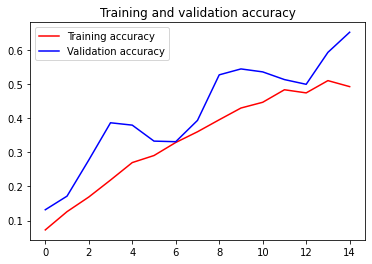

<Figure size 432x288 with 0 Axes>

In [59]:
def plot_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  
  plt.show()

plot_loss(history)

In [60]:
def load_image(img_path, show=False):

    img = load_img(img_path, target_size=(150, 150))
    img_tensor = img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

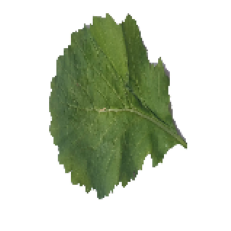

Sawi India


In [63]:
label_map = (train_generator.class_indices)
label_map = {v: k for k, v in label_map.items()}
image_path ='/content/Segmented Medicinal Leaf Images/test/Sawi India/BJ-S-010.jpg'
image = load_image(image_path, show=True)
print(label_map[np.argmax(model.predict(image))])

In [25]:
image = load_img('/content/Segmented Medicinal Leaf Images/test/Bayam Hijau/AV-S-009.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7EFCCAC16990>


array([ 0,  0,  0, ..., 31, 31, 31], dtype=int32)